In [1]:
import pandas as pd
dataset = pd.read_csv('regression.txt')
dataset.describe()

,x,y
count,240.000000,240.000000
mean,0.505000,0.103008
std,0.287565,1.029367
min,0.010000,-1.909000
25%,0.257750,-0.676000
50%,0.505000,0.185500
75%,0.752250,0.741500
max,1.000000,2.286000


In [2]:
import numpy as np

In [3]:
y = dataset.loc[:, 'y'].values
X = dataset.loc[:, 'x'].values[:, np.newaxis]

In the following section we are creating the `train_set` and `test_set` from the given dataset.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from knn import KNN


for k in range(1, 15): # loop over k values to see their MSE
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    mse = 0
    i = 0
    for predicted, actual in zip(clf.predict(X_test), y_test):
        mse += (actual - predicted) ** 2
        i += 1
    mse = mse / i

    print(f'{f"k = {k}":-^20}\n')

    print(f'mse: {mse}\n')

-------k = 1--------

mse: 0.07220366249999999

-------k = 2--------

mse: 0.06454075937500002

-------k = 3--------

mse: 0.05344052916666664

-------k = 4--------

mse: 0.0469707609375

-------k = 5--------

mse: 0.045633967499999976

-------k = 6--------

mse: 0.046345845833333316

-------k = 7--------

mse: 0.04617606428571427

-------k = 8--------

mse: 0.04625193105468747

-------k = 9--------

mse: 0.04696932716049382

-------k = 10-------

mse: 0.046318688749999976

-------k = 11-------

mse: 0.04818816126033058

-------k = 12-------

mse: 0.048083361024305556

-------k = 13-------

mse: 0.05111189445266271

-------k = 14-------

mse: 0.05284715286989794



Here we are creating a plot for `test set` and its prediction based on `train set`. from the previous cell we choose `k = 8`.

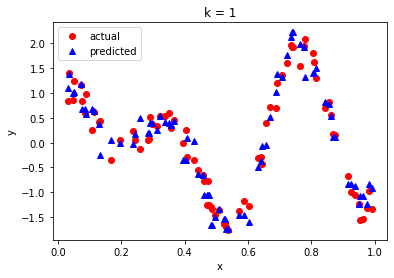

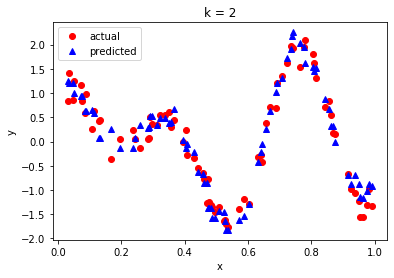

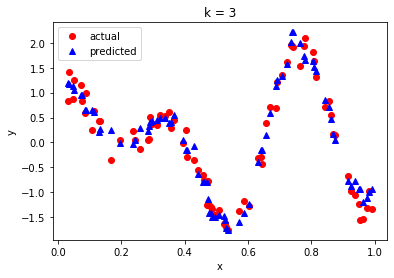

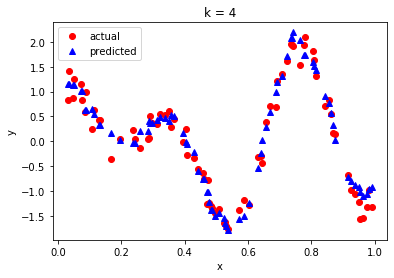

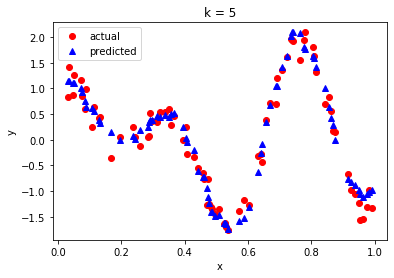

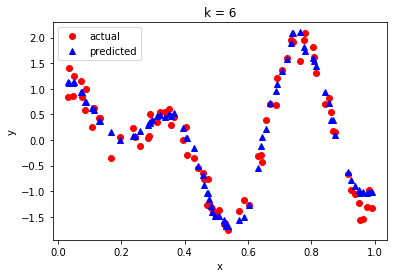

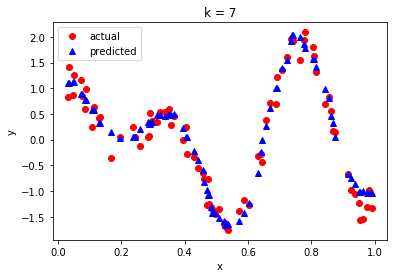

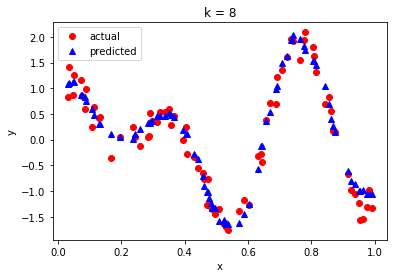

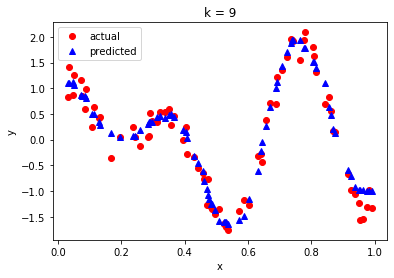

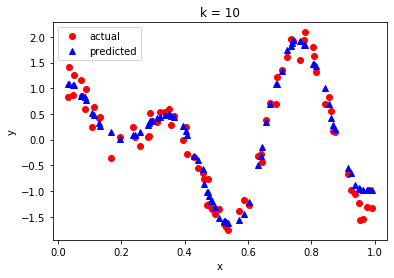

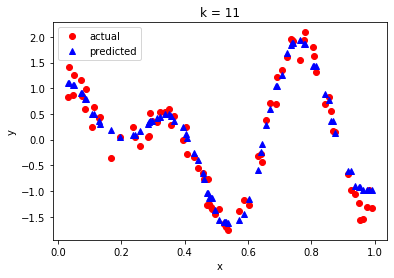

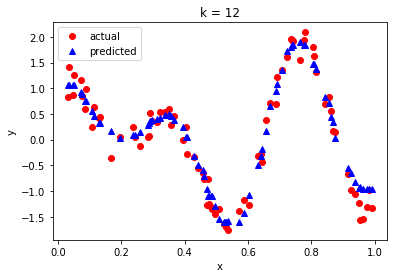

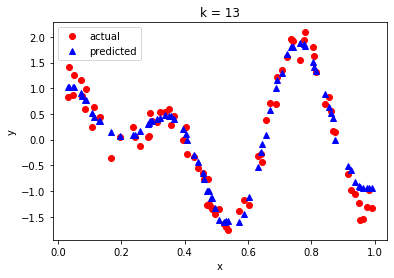

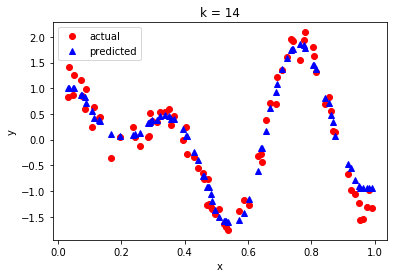

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

from knn import KNN


for k in range(1, 15): # loop over k values to see their MSE
    clf = KNN(k=k)
    clf.fit(X_train, y_train)

    plt.title(f'k = {k}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X_test, y_test, 'ro', label='actual')
    plt.plot(X_test, clf.predict(X_test), 'b^', label='predicted')
    plt.legend(loc='upper left')
    plt.show()
